<a href="https://colab.research.google.com/github/divyalaldinani/Deep-Learning-in-TensorFlow/blob/main/05_transfer_learning_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [203]:
!nvidia-smi

Thu Jan 23 22:06:20 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              32W /  70W |   2219MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [204]:
!nvidia-smi

Thu Jan 23 22:06:23 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              32W /  70W |   2219MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [205]:
!wget https://raw.githubusercontent.com/divyalaldinani/Deep-Learning-in-TensorFlow/refs/heads/main/extras/helper_functions.py

--2025-01-23 22:06:23--  https://raw.githubusercontent.com/divyalaldinani/Deep-Learning-in-TensorFlow/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4090 (4.0K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]   3.99K  --.-KB/s    in 0s      

2025-01-23 22:06:23 (62.8 MB/s) - ‘helper_functions.py.1’ saved [4090/4090]



In [206]:
from helper_functions import pred_and_plot, plot_loss_curves, unzip_folder, walk_through_directory, view_random_image, view_random_image_and_augmented, create_tensorboard_callback1

### Downloading the dataset

In [207]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_folder("10_food_classes_10_percent.zip")

--2025-01-23 22:06:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.207, 142.251.31.207, 142.251.18.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  38.6MB/s    in 4.8s    

2025-01-23 22:06:28 (33.2 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [208]:
walk_through_directory('/content/10_food_classes_10_percent')

2 directories and 0 files in /content/10_food_classes_10_percent
10 directories and 0 files in /content/10_food_classes_10_percent/test
0 directories and 250 files in /content/10_food_classes_10_percent/test/hamburger
0 directories and 250 files in /content/10_food_classes_10_percent/test/ice_cream
0 directories and 250 files in /content/10_food_classes_10_percent/test/ramen
0 directories and 250 files in /content/10_food_classes_10_percent/test/steak
0 directories and 250 files in /content/10_food_classes_10_percent/test/chicken_curry
0 directories and 250 files in /content/10_food_classes_10_percent/test/pizza
0 directories and 250 files in /content/10_food_classes_10_percent/test/grilled_salmon
0 directories and 250 files in /content/10_food_classes_10_percent/test/fried_rice
0 directories and 250 files in /content/10_food_classes_10_percent/test/sushi
0 directories and 250 files in /content/10_food_classes_10_percent/test/chicken_wings
10 directories and 0 files in /content/10_food

In [209]:
train_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

#### Input Data Pipelines
**using tf.keras.preprocessing.image_dataset_from_directory() -> creates tf.data.Dataset object, explore [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)**

In [210]:
import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE= 32
IMAGE_SIZE = (224, 224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                         batch_size=BATCH_SIZE,
                                                                         image_size=IMAGE_SIZE,
                                                                         shuffle=True,
                                                                         label_mode='categorical' # one hot encoded
                                                                         )

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                             batch_size=BATCH_SIZE,
                                                             image_size = IMAGE_SIZE,
                                                             shuffle=True,
                                                             label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [211]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [212]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [213]:
# see a batch of Data

for images, labels in train_data_10_percent.take(1):
    print(images, labels)

tf.Tensor(
[[[[ 35.332592    25.332588    23.332588  ]
   [ 31.          23.          21.        ]
   [ 31.857143    27.07143     24.07143   ]
   ...
   [ 36.38163     17.903952    11.062259  ]
   [ 34.47768     16.           8.738839  ]
   [ 33.120502    14.642822     7.3816614 ]]

  [[ 36.07143     26.071428    24.071428  ]
   [ 31.055964    23.055964    21.055964  ]
   [ 31.073662    26.287949    23.287949  ]
   ...
   [ 34.07583     18.642792    11.978536  ]
   [ 31.377062    15.944027     8.727509  ]
   [ 29.292376    13.859341     6.6428223 ]]

  [[ 37.180645    27.180645    25.180645  ]
   [ 31.093271    23.093271    21.093271  ]
   [ 30.791615    26.005901    23.005901  ]
   ...
   [ 33.336987    20.799854    15.988731  ]
   [ 29.295103    16.906712    11.518319  ]
   [ 25.921988    13.533596     8.145204  ]]

  ...

  [[ 83.0549      40.054905     5.697762  ]
   [ 65.55843     20.558437     0.        ]
   [ 78.79103     33.7255       2.2969275 ]
   ...
   [131.72021    135.720

### Creating model with `tf.keras.applications`

In [214]:
# from tf.keras.applications import MobileV3Small

base_model = tf.keras.applications.MobileNetV3Small(
    weights='imagenet',
    input_shape=IMAGE_SIZE+(3,),
    include_top=False,
    include_preprocessing = True
)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name = 'input_layer')

x = base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x) #returns (batch_size, channels)

outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')(x) # trains on batch_size requires (batch_size, features)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_0 = model_0.fit(x = train_data_10_percent,
                        validation_data=test_data,
                        epochs=5)

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 571ms/step - accuracy: 0.1308 - loss: 2.6422 - val_accuracy: 0.3052 - val_loss: 1.9271
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 320ms/step - accuracy: 0.4323 - loss: 1.7631 - val_accuracy: 0.5272 - val_loss: 1.4936
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 275ms/step - accuracy: 0.5889 - loss: 1.3816 - val_accuracy: 0.6468 - val_loss: 1.2299
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 288ms/step - accuracy: 0.7074 - loss: 1.1123 - val_accuracy: 0.6724 - val_loss: 1.1019
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 211ms/step - accuracy: 0.7143 - loss: 1.0074 - val_accuracy: 0.7232 - val_loss: 0.9790


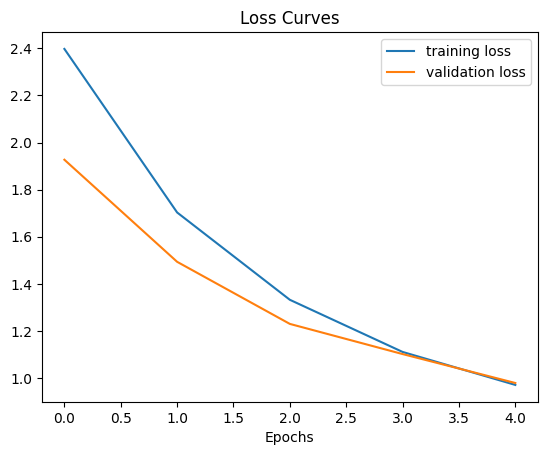

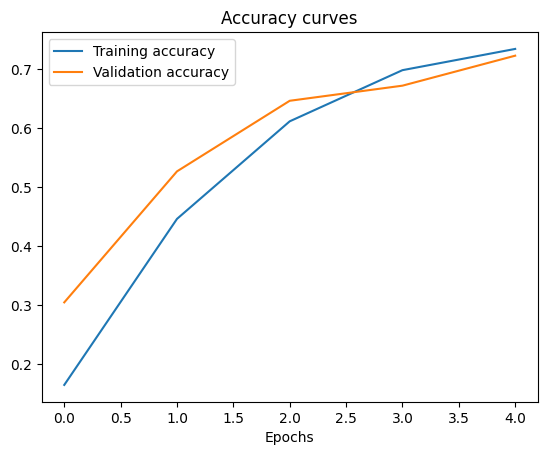

In [215]:
plot_loss_curves(history_0)

In [216]:
# checking out layers in model

for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name)

0 input_layer_16
1 rescaling_8
2 conv
3 conv_bn
4 activation_144
5 expanded_conv_depthwise_pad
6 expanded_conv_depthwise
7 expanded_conv_depthwise_bn
8 re_lu_112
9 expanded_conv_squeeze_excite_avg_pool
10 expanded_conv_squeeze_excite_conv
11 expanded_conv_squeeze_excite_relu
12 expanded_conv_squeeze_excite_conv_1
13 re_lu_113
14 expanded_conv_squeeze_excite_mul
15 expanded_conv_project
16 expanded_conv_project_bn
17 expanded_conv_1_expand
18 expanded_conv_1_expand_bn
19 re_lu_114
20 expanded_conv_1_depthwise_pad
21 expanded_conv_1_depthwise
22 expanded_conv_1_depthwise_bn
23 re_lu_115
24 expanded_conv_1_project
25 expanded_conv_1_project_bn
26 expanded_conv_2_expand
27 expanded_conv_2_expand_bn
28 re_lu_116
29 expanded_conv_2_depthwise
30 expanded_conv_2_depthwise_bn
31 re_lu_117
32 expanded_conv_2_project
33 expanded_conv_2_project_bn
34 expanded_conv_2_add
35 expanded_conv_3_expand
36 expanded_conv_3_expand_bn
37 activation_145
38 expanded_conv_3_depthwise_pad
39 expanded_conv_3_dept

In [217]:
for layer_number, layer in enumerate(model_0.layers):
    print(layer_number, layer.name)

0 input_layer
1 MobileNetV3Small
2 global_average_pooling_layer
3 output_layer


In [218]:
base_model.summary() #trained mobile net whose layers are frozen

Model: "MobileNetV3Small"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_8 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv (Conv2D)             │ (None, 112, 112, 16)   │            432 │ rescaling_8[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_bn                   │ (None, 112, 112, 16)   │             64 │ conv[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_144            │ (None, 112, 112, 16)   │              0 │ conv_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 113, 113, 16)   │              0 │ activation_144[0][0]   │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 56, 56, 16)     │            144 │ expanded_conv_depthwi… │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 56, 56, 16)     │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_112 (ReLU)          │ (None, 56, 56, 16)     │              0 │ expanded_conv_depthwi… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │              0 │ re_lu_112[0][0]        │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │            136 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │              0 │ expanded_conv_squeeze… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │            144 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_72 (Add)              │ (None, 1, 1, 16)       │              0 │ expanded_conv_squeeze… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_113 (ReLU)     

 Total params: 939,120 (3.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 939,120 (3.58 MB)

In [219]:
model_0.summary() # only weights, baises in last layer can be modified

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MobileNetV3Small (Functional)        │ (None, 7, 7, 576)           │         939,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 576)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           5,770 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 956,432 (3.65 MB)

 Trainable params: 5,770 (22.54 KB)

 Non-trainable params: 939,120 (3.58 MB)

 Optimizer params: 11,542 (45.09 KB)

In [220]:
results_0 = model_0.evaluate(test_data)
results_0

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.7301 - loss: 0.9686


[0.978961706161499, 0.7232000231742859]

### Training other models

In [221]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_folder('10_food_classes_1_percent.zip')

--2025-01-23 22:07:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.207, 108.177.96.207, 108.177.119.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M  18.3MB/s    in 7.7s    

2025-01-23 22:07:40 (16.5 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [222]:
train_dir_1_percent = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_1_percent/test'


In [223]:
walk_through_directory('10_food_classes_1_percent')

2 directories and 0 files in 10_food_classes_1_percent
10 directories and 0 files in 10_food_classes_1_percent/test
0 directories and 250 files in 10_food_classes_1_percent/test/hamburger
0 directories and 250 files in 10_food_classes_1_percent/test/ice_cream
0 directories and 250 files in 10_food_classes_1_percent/test/ramen
0 directories and 250 files in 10_food_classes_1_percent/test/steak
0 directories and 250 files in 10_food_classes_1_percent/test/chicken_curry
0 directories and 250 files in 10_food_classes_1_percent/test/pizza
0 directories and 250 files in 10_food_classes_1_percent/test/grilled_salmon
0 directories and 250 files in 10_food_classes_1_percent/test/fried_rice
0 directories and 250 files in 10_food_classes_1_percent/test/sushi
0 directories and 250 files in 10_food_classes_1_percent/test/chicken_wings
10 directories and 0 files in 10_food_classes_1_percent/train
0 directories and 7 files in 10_food_classes_1_percent/train/hamburger
0 directories and 7 files in 10_f

In [224]:
import tensorflow as tf

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,

                                                                           label_mode ='categorical',
                                                                           batch_size=BATCH_SIZE,
                                                                           image_size=IMAGE_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                batch_size = BATCH_SIZE,
                                                                image_size=IMAGE_SIZE)



Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [225]:
### Adding data augmentaion directly into the model
from tensorflow.keras import layers

# generates 1 augmented Image per input image
data_augmentation = tf.keras.Sequential([
    layers.Resizing(224, 224),  # Resize to specific dimensions
    layers.RandomFlip('horizontal'),
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2)
], name= 'data_augmentationn')

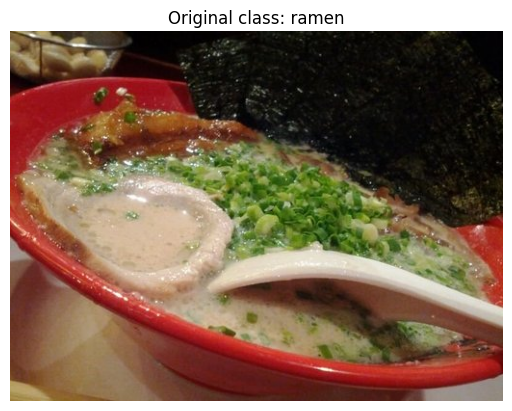

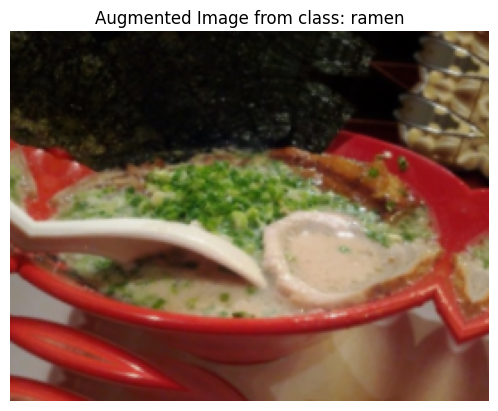

In [226]:
view_random_image_and_augmented(train_data_1_percent.class_names, train_dir_1_percent, data_augmentation)

In [227]:
print(augmented_image)

tf.Tensor(
[[[ 98  94  83]
  [100  96  85]
  [101  97  86]
  ...
  [124 124 124]
  [124 124 122]
  [122 122 121]]

 [[ 97  93  82]
  [ 99  95  84]
  [101  97  86]
  ...
  [123 123 122]
  [122 122 120]
  [119 119 117]]

 [[ 96  90  81]
  [ 99  93  83]
  [100  96  84]
  ...
  [122 122 120]
  [119 119 117]
  [116 116 115]]

 ...

 [[144 144 145]
  [142 142 143]
  [142 142 142]
  ...
  [ 85  80  74]
  [ 84  81  74]
  [ 85  83  74]]

 [[143 143 145]
  [142 142 142]
  [141 141 142]
  ...
  [ 83  78  72]
  [ 83  78  72]
  [ 84  80  73]]

 [[143 143 145]
  [142 142 143]
  [142 142 142]
  ...
  [ 81  77  72]
  [ 82  78  72]
  [ 85  81  74]]], shape=(220, 223, 3), dtype=uint8)


### Model 1: Feature extraction using transfer learning on 1% of data + data augmentation

In [228]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.MobileNetV3Small(include_top=False)#normalizes the image values

base_model.trainable=False

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B
] ,name="data_augmentation" )



inputs = layers.Input(shape=input_shape, name='input_layer')

# adds in data augmentation as a layer
x = data_augmentation(inputs)
print(f"Shape of x is: {x.shape}")
# inputs after data augmentation, and freeze base model weights
x = base_model(x, training = False)

x = layers.GlobalAveragePooling2D(name='global_average_poooling_layer')(x)

outputs = layers.Dense(10, activation='softmax', name='output_layer')(x) # 10 -> 10 categories in our data

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data_1_percent,
                        epochs = 5,
                        validation_data=test_data,
                        callbacks = [create_tensorboard_callback1("transfer_learning-2", 'model_1')])


Shape of x is: (None, None, None, 3)
Saving TensorBoard log files to : transfer_learning-2/model_1/20250123-220742
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 413ms/step - accuracy: 0.1318 - loss: 2.4106 - val_accuracy: 0.3116 - val_loss: 1.9498
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 406ms/step - accuracy: 0.2831 - loss: 1.9880 - val_accuracy: 0.5216 - val_loss: 1.5318
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 535ms/step - accuracy: 0.4941 - loss: 1.6035 - val_accuracy: 0.6108 - val_loss: 1.2967
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 241ms/step - accuracy: 0.5904 - loss: 1.3909 - val_accuracy: 0.6752 - val_loss: 1.1245
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 529ms/step - accuracy: 0.6380 - loss: 1.2114 - val_accuracy: 0.7064 - val_loss: 1.0347


In [229]:
inputs

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=input_layer>

In [230]:
model_1.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MobileNetV3Small (Functional)        │ (None, None, None, 576)     │         939,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_poooling_layer        │ (None, 576)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           5,770 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 956,432 (3.65 MB)

 Trainable params: 5,770 (22.54 KB)

 Non-trainable params: 939,120 (3.58 MB)

 Optimizer params: 11,542 (45.09 KB)

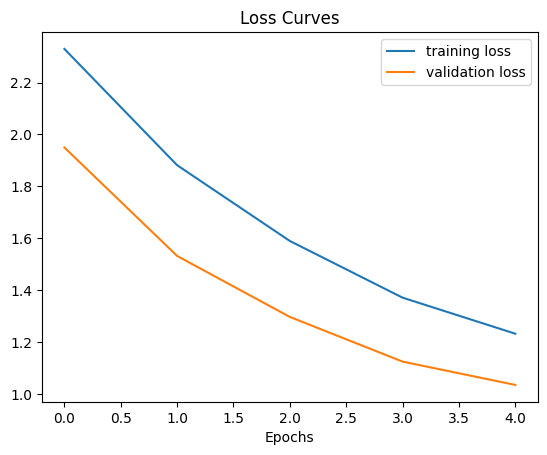

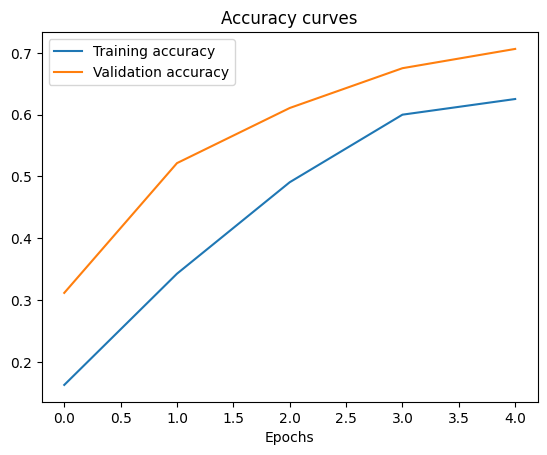

In [231]:
plot_loss_curves(history_1)

In [232]:
results_1 = model_1.evaluate(test_data)
results_1

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.7053 - loss: 1.0393


[1.0346648693084717, 0.7063999772071838]

### Model 3: Fine-Tuning an existing model(Mobile net) on 10% of training data

In [233]:
# create a functional model with data augmentation
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


input_shape = (224, 224, 3)

base_model = tf.keras.applications.MobileNetV3Small(include_top = False) # remove output layers as org model has diff number of output categories
base_model.trainable = False
data_aug = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
], name = "data_augmentation")


inputs = layers.Input(shape=input_shape, name = 'input_layer')
x = data_aug(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name='global_pooling')(x)
outputs = layers.Dense(10, activation='softmax', name = 'output_layer')(x)
model_2 = tf.keras.Model(inputs, outputs)


model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [234]:
# to use this code again we will put it in a afunction
def create_base_model(training=False, lr=0.001, input_shape=(224, 224, 3)) -> tf.keras.Model:
    # input_shape = (224, 224, 3)

    base_model = tf.keras.applications.MobileNetV3Small(include_top = False) # remove output layers as org model has diff number of output categories
    base_model.trainable = training
    data_aug = tf.keras.Sequential([
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
        layers.RandomHeight(0.2),
        layers.RandomWidth(0.2)
    ], name = "data_augmentation")


    inputs = layers.Input(shape=input_shape, name = 'input_layer')
    x = data_aug(inputs)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D(name='global_pooling')(x)
    outputs = layers.Dense(10, activation='softmax', name = 'output_layer')(x)
    model = tf.keras.Model(inputs, outputs)


    model.compile(loss='categorical_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                    metrics=['accuracy'])
    return model

model_2 = create_base_model()

### Creating a Model Checkpoint callback

the ModelCheckpoint callback allows us to save the model in 'SavedModel' format.
This allows you to save the model trained previously.

In [235]:
checkpoint_path = 'model_2_checkpoints_weights/ckpt/checkpoint.weights.h5'

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True, #save the best model
                                                         save_freq='epoch',
                                                         verbose=1
                                                         )

In [236]:
model_2

<Functional name=functional_23, built=True>

In [237]:
initial_epochs = 5

history_2 = model_2.fit(train_data_10_percent,
                        epochs=initial_epochs,
                        validation_data = test_data,
                        callbacks=[create_tensorboard_callback1('transfer-learning-2', 'model_2'), checkpoint_callback])

Saving TensorBoard log files to : transfer-learning-2/model_2/20250123-220903
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.1236 - loss: 2.5705
Epoch 1: val_loss improved from inf to 2.03150, saving model to model_2_checkpoints_weights/ckpt/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 393ms/step - accuracy: 0.1250 - loss: 2.5642 - val_accuracy: 0.2624 - val_loss: 2.0315
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.3068 - loss: 1.9625
Epoch 2: val_loss improved from 2.03150 to 1.58562, saving model to model_2_checkpoints_weights/ckpt/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 311ms/step - accuracy: 0.3086 - loss: 1.9596 - val_accuracy: 0.4772 - val_loss: 1.5856
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.4441 - loss: 1.6477
Epoch 3: val_loss improved from 1.58562 to 1.34172, saving model to model_2_checkpoints_weights/ckpt/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 375ms/step - accuracy: 0.4456 - loss: 

In [238]:
results_2 = model_2.evaluate(test_data)
results_2

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.6791 - loss: 1.0772


[1.0783289670944214, 0.6808000206947327]

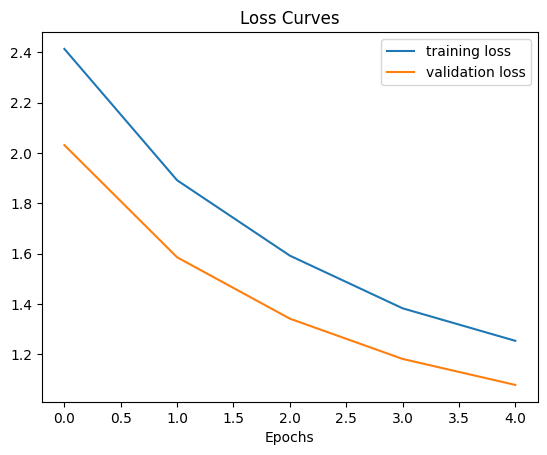

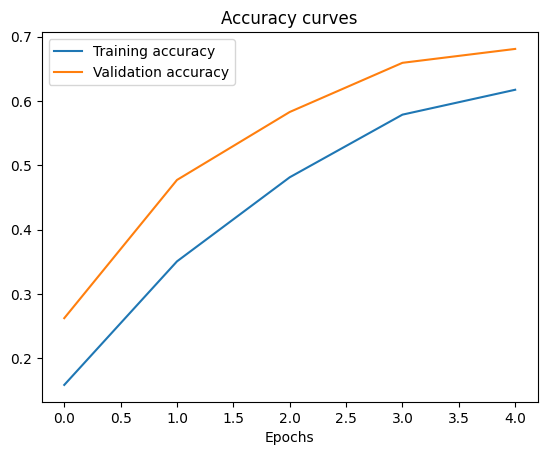

In [239]:
plot_loss_curves(history_2)


#### making use of ModelCheckpoint that saved the model's weights only && **why it CAN BE different from model 2?**

In [240]:
model_2.load_weights(checkpoint_path) # stores the best model version of model 2(while training), thats what we saved, right?
loaded_weights_model_2_results = model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6804 - loss: 1.0779


In [241]:
loaded_weights_model_2_results == results_2  # due to precision of weights stored, there can be variations

False

In [242]:
import numpy as np
np.isclose(np.array(results_2), np.array(loaded_weights_model_2_results))


array([ True,  True])

### Model 3: Fine-Tuning an existing model on 10% of data without data augmnetation

In [243]:
model_2.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=data_augmentation, built=True>,
 <Functional name=MobileNetV3Small, built=True>,
 <GlobalAveragePooling2D name=global_pooling, built=True>,
 <Dense name=output_layer, built=True>]

In [244]:
for layer_num, layer in enumerate(model_2.layers):
    print(f"Layer number: {layer_num} | Layer name: {layer.name} | Layer type: {layer} | Trainable: {layer.trainable}")

Layer number: 0 | Layer name: input_layer | Layer type: <InputLayer name=input_layer, built=True> | Trainable: True
Layer number: 1 | Layer name: data_augmentation | Layer type: <Sequential name=data_augmentation, built=True> | Trainable: True
Layer number: 2 | Layer name: MobileNetV3Small | Layer type: <Functional name=MobileNetV3Small, built=True> | Trainable: False
Layer number: 3 | Layer name: global_pooling | Layer type: <GlobalAveragePooling2D name=global_pooling, built=True> | Trainable: True
Layer number: 4 | Layer name: output_layer | Layer type: <Dense name=output_layer, built=True> | Trainable: True


In [245]:
model_2.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MobileNetV3Small (Functional)        │ (None, None, None, 576)     │         939,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_pooling                       │ (None, 576)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           5,770 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 956,432 (3.65 MB)

 Trainable params: 5,770 (22.54 KB)

 Non-trainable params: 939,120 (3.58 MB)

 Optimizer params: 11,542 (45.09 KB)

In [246]:
model_2.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=data_augmentation, built=True>,
 <Functional name=MobileNetV3Small, built=True>,
 <GlobalAveragePooling2D name=global_pooling, built=True>,
 <Dense name=output_layer, built=True>]

In [247]:
model_2.layers[2]

<Functional name=MobileNetV3Small, built=True>

In [248]:
model_2.layers[2].layers

[<InputLayer name=input_layer_22, built=True>,
 <Rescaling name=rescaling_11, built=True>,
 <Conv2D name=conv, built=True>,
 <BatchNormalization name=conv_bn, built=True>,
 <Activation name=activation_198, built=True>,
 <ZeroPadding2D name=expanded_conv_depthwise_pad, built=True>,
 <DepthwiseConv2D name=expanded_conv_depthwise, built=True>,
 <BatchNormalization name=expanded_conv_depthwise_bn, built=True>,
 <ReLU name=re_lu_154, built=True>,
 <GlobalAveragePooling2D name=expanded_conv_squeeze_excite_avg_pool, built=True>,
 <Conv2D name=expanded_conv_squeeze_excite_conv, built=True>,
 <ReLU name=expanded_conv_squeeze_excite_relu, built=True>,
 <Conv2D name=expanded_conv_squeeze_excite_conv_1, built=True>,
 <ReLU name=re_lu_155, built=True>,
 <Multiply name=expanded_conv_squeeze_excite_mul, built=True>,
 <Conv2D name=expanded_conv_project, built=True>,
 <BatchNormalization name=expanded_conv_project_bn, built=True>,
 <Conv2D name=expanded_conv_1_expand, built=True>,
 <BatchNormalization 

#### top layers learn generic patterns from data, thus we dont want to train those while fine tuning, we want to change the way in which our model takes in the details and interprets it, for this we should train bottom layer(layers towards the output)

In [249]:
model_2_base_model = model_2.layers[2] # MobileNetV3Small

listt = [1, 2, 3, 4, 5]
for num in listt[-2:]:
  print(num)

4
5


In [250]:
model_2_base_model.trainable = True # train bottom 10 layers
for layer in model_2_base_model.layers[:-10]:
    layer.trainable = False

for layer in model_2_base_model.layers[-10:]:
    layer.trainable = True


model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), # to allow gradual learning and not drastic changes
                metrics=['accuracy'])

model_2.load_weights(checkpoint_path)

In [251]:
for layer in model_2.layers[2].layers:
  print(f"{layer.name} {layer.trainable}")

model_2.layers[2].trainable

input_layer_22 False
rescaling_11 False
conv False
conv_bn False
activation_198 False
expanded_conv_depthwise_pad False
expanded_conv_depthwise False
expanded_conv_depthwise_bn False
re_lu_154 False
expanded_conv_squeeze_excite_avg_pool False
expanded_conv_squeeze_excite_conv False
expanded_conv_squeeze_excite_relu False
expanded_conv_squeeze_excite_conv_1 False
re_lu_155 False
expanded_conv_squeeze_excite_mul False
expanded_conv_project False
expanded_conv_project_bn False
expanded_conv_1_expand False
expanded_conv_1_expand_bn False
re_lu_156 False
expanded_conv_1_depthwise_pad False
expanded_conv_1_depthwise False
expanded_conv_1_depthwise_bn False
re_lu_157 False
expanded_conv_1_project False
expanded_conv_1_project_bn False
expanded_conv_2_expand False
expanded_conv_2_expand_bn False
re_lu_158 False
expanded_conv_2_depthwise False
expanded_conv_2_depthwise_bn False
re_lu_159 False
expanded_conv_2_project False
expanded_conv_2_project_bn False
expanded_conv_2_add False
expanded_conv

True

In [252]:
fine_tune_epochs = initial_epochs

history_2_unfreezed = model_2.fit(train_data_10_percent,
                                  validation_data= test_data,
                                  epochs = fine_tune_epochs,
                                  callbacks=[create_tensorboard_callback1('transfer-learning-2', 'model_2-unfreezed')])

Saving TensorBoard log files to : transfer-learning-2/model_2-unfreezed/20250123-221021
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 23s 583ms/step - accuracy: 0.5514 - loss: 1.3775 - val_accuracy: 0.6540 - val_loss: 1.1063
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 243ms/step - accuracy: 0.6779 - loss: 1.1133 - val_accuracy: 0.6232 - val_loss: 1.1537
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 342ms/step - accuracy: 0.6859 - loss: 1.0640 - val_accuracy: 0.6288 - val_loss: 1.1394
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 301ms/step - accuracy: 0.6837 - loss: 1.0464 - val_accuracy: 0.6360 - val_loss: 1.1071
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 296ms/step - accuracy: 0.6999 - loss: 1.0011 - val_accuracy: 0.6444 - val_loss: 1.0768


In [256]:
results_2_fine_tuning_10_percent = model_2.evaluate(test_data)
results_2_fine_tuning_10_percent

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.6797 - loss: 1.0744


[1.0783288478851318, 0.6808000206947327]

In [257]:
#### Creating Model 4 fine tuned for 5 epochs on 100% of data while keeping base model as same

model_2 = create_base_model(lr=0.0001)

In [258]:
model_2.load_weights(checkpoint_path)

In [259]:
model_2.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MobileNetV3Small (Functional)        │ (None, None, None, 576)     │         939,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_pooling                       │ (None, 576)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           5,770 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 944,890 (3.60 MB)

 Trainable params: 5,770 (22.54 KB)

 Non-trainable params: 939,120 (3.58 MB)

In [260]:
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.6810 - loss: 1.0798


[1.0783288478851318, 0.6808000206947327]

In [261]:
model_2.layers[2].trainable = True
for layer in model_2.layers[2].layers[:-10]:
    layer.trainable = False

for layer in model_2.layers[2].layers[-10:]:
    layer.trainable = True

for layer in model_2.layers[2].layers:
  print(f"{layer} {layer.trainable}")

<InputLayer name=input_layer_26, built=True> False
<Rescaling name=rescaling_13, built=True> False
<Conv2D name=conv, built=True> False
<BatchNormalization name=conv_bn, built=True> False
<Activation name=activation_234, built=True> False
<ZeroPadding2D name=expanded_conv_depthwise_pad, built=True> False
<DepthwiseConv2D name=expanded_conv_depthwise, built=True> False
<BatchNormalization name=expanded_conv_depthwise_bn, built=True> False
<ReLU name=re_lu_182, built=True> False
<GlobalAveragePooling2D name=expanded_conv_squeeze_excite_avg_pool, built=True> False
<Conv2D name=expanded_conv_squeeze_excite_conv, built=True> False
<ReLU name=expanded_conv_squeeze_excite_relu, built=True> False
<Conv2D name=expanded_conv_squeeze_excite_conv_1, built=True> False
<ReLU name=re_lu_183, built=True> False
<Multiply name=expanded_conv_squeeze_excite_mul, built=True> False
<Conv2D name=expanded_conv_project, built=True> False
<BatchNormalization name=expanded_conv_project_bn, built=True> False
<Con

In [267]:
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy']
                )

model_2.load_weights(checkpoint_path)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [265]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_folder("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


--2025-01-23 22:25:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.207, 173.194.79.207, 108.177.96.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  41.2MB/s    in 13s     

2025-01-23 22:25:21 (38.5 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [266]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

# Note: this is the same test dataset we've been using for the previous modelling experiments
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [268]:
history_2_unfreezed_trained_on_full = model_2.fit(train_data_10_classes_full,
                                                  validation_data=test_data,
                                                  epochs=5,
                                                  callbacks=[create_tensorboard_callback1('transfer-learning-2', 'model-4')])

Saving TensorBoard log files to : transfer-learning-2/model-4/20250123-222736
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 129ms/step - accuracy: 0.5660 - loss: 1.3502 - val_accuracy: 0.7128 - val_loss: 0.9110
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.6674 - loss: 1.0415 - val_accuracy: 0.7600 - val_loss: 0.7417
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - accuracy: 0.7030 - loss: 0.9162 - val_accuracy: 0.7888 - val_loss: 0.6393
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 45s 125ms/step - accuracy: 0.7206 - loss: 0.8607 - val_accuracy: 0.8152 - val_loss: 0.5660
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - accuracy: 0.7450 - loss: 0.7989 - val_accuracy: 0.8324 - val_loss: 0.5229


In [269]:
results_4 = model_2.evaluate(test_data)
results_4

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.8321 - loss: 0.5308


[0.5228596925735474, 0.8324000239372253]

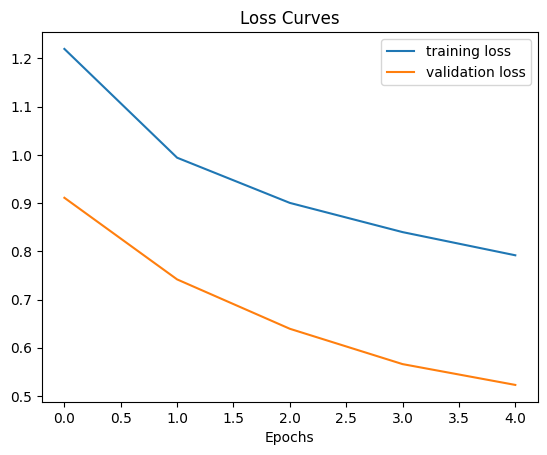

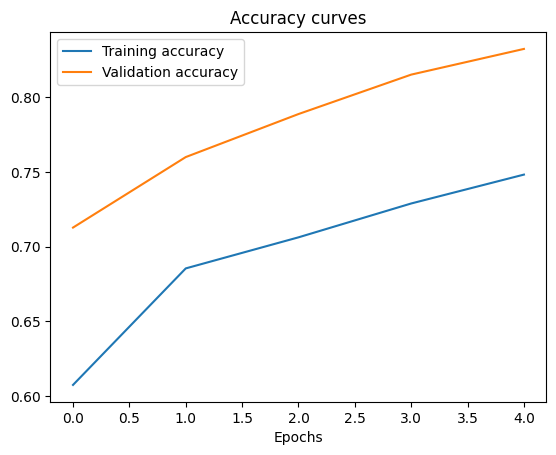

In [270]:
plot_loss_curves(history_2_unfreezed_trained_on_full)